# AFFINE TRANSFORM

In [247]:
import numpy as np
import tensorflow as tf
import scipy

In [248]:
def load_dataset():
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
    return (x_train,y_train),(x_test,y_test)

In [249]:
(train_data,train_label),(test_data,test_label)=load_dataset()

# Visualization

In [250]:
import matplotlib.pyplot as plt

[]

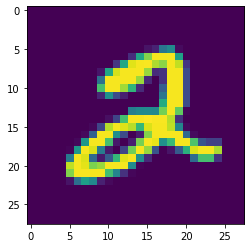

In [251]:
image=train_data[5]
plt.imshow(image)
plt.plot()

# Formula calculations

In [252]:
a=[a for a in range(28)]
b=[a for a in range(28)]

x,y=np.mgrid[:28,:28]

## Finding the coordinates of centroid (x_mean, y_mean)

In [253]:
def find_means(x,y,data):
    x_mean=np.sum(x*data)/(np.sum(data))
    y_mean=np.sum(y*data)/(np.sum(data))
    
    return x_mean,y_mean

In [254]:
x_mean,y_mean=find_means(x,y,image)

In [255]:
x_mean,y_mean

(14.074794770446944, 14.018850714502888)

## Covariance matrix

In [256]:
def find_covar_mat(x,y,data):
    u_20=np.sum(((x-x_mean)**2)*data)
    u_02=np.sum(((y-y_mean)**2)*data)
    u_11=np.sum(((x-x_mean)*(y-y_mean))*data)
    u_00=np.sum(data)
    
    corr=u_11/u_20
    covar_mat=[[u_20/u_00,u_11/u_00],[u_11/u_00,u_02/u_00]]
#     corr=u_11/u
    return covar_mat,corr

In [257]:
find_covar_mat(x,y,image)

([[22.447701239087547, -7.034820968275038],
  [-7.034820968275038, 20.583341147302708]],
 -0.3133871434472543)

## Finding the angle of rotation

In [258]:
m,corr=find_covar_mat(x,y,image)
angle=-1*0.5*np.arctan((2*m[0][1])/(m[0][0]-m[1][1]))

In [259]:
angle

0.7195272017999508

## Finding the rotation matrix

### [[cos(theta),-sin(theta)],[sin(theta),cos(theta)]]

In [260]:
# corr_matrix=u_
# rot_mat=[[np.cos(angle),-1*np.sin(angle)],[np.sin(angle),np.cos(angle)]]
rot_mat=[[1,0],[corr,1]]

In [261]:
rot_mat

[[1, 0], [-0.3133871434472543, 1]]

# Finding offset for scipy.ndimage.affine_transform

## centroid = np.dot(matrix, o) + offset
## Therefore, offset=centroid - np.dot(matrix, o)

### Calculating the offset for scipy affine_transform function

In [262]:
offset=[x_mean,y_mean]-np.dot(rot_mat,[14,14])

In [263]:
offset

array([0.07479477, 4.40627072])

## Applying affine transform on image

In [264]:
from scipy.ndimage import affine_transform

In [265]:
def final_image():
    final_img=affine_transform(image,rot_mat,offset=offset)
    return final_img

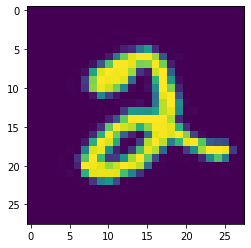

In [266]:
final_img=final_image()
plt.imshow(final_img)